#**Mapping the Landscape of Generative AI Research through Web of Science**
---

###*Done By: Surya Vinay Kumar*

##**Introduction**

The landscape of artificial intelligence (AI) is continually evolving, with generative AI emerging as a pivotal area of research and innovation. In this project, we embark on a systematic exploration of the intellectual fabric surrounding generative AI, leveraging the expansive Web of Science (WoS) database to unveil key research themes, trends, and connections within this domain. By employing advanced analytical techniques centered on keyword co-occurrence networks derived from author keywords, we aim to illuminate the underlying structure and uncover fundamental insights driving generative AI research.

The primary objectives of this study encompass comprehensive literature retrieval, co-occurrence network analysis, and the identification of key research themes within the field of generative AI. First, through a meticulous search strategy utilizing defined search terms such as "generative adversarial networks" and "generative AI" among others, we will systematically retrieve relevant publications from the Web of Science database. This initial step sets the foundation for our subsequent analyses, ensuring a comprehensive and representative collection of literature pertaining to generative AI.

Subsequently, we will construct and analyze a keyword co-occurrence network derived from author keywords associated with the retrieved publications. This network visualization will offer a nuanced depiction of how different research themes in generative AI interconnect, highlighting pivotal keywords and unveiling prominent areas of focus within the research community.

The crux of our analysis lies in the weighted network analysis of the keyword co-occurrence network, which will facilitate a deeper understanding of prevailing research emphases and aid in the prediction of future trends in generative AI. By deciphering the intellectual structure and identifying core themes, this project aims to contribute valuable insights that can inform academic discourse, guide practitioners, and inspire policy decisions in the rapidly evolving landscape of generative artificial intelligence.

The culmination of our efforts will be presented in a comprehensive Python notebook, integrating textual descriptions, equations, and executable code to document our analytical journey. This deliverable encapsulates our findings, methodologies, and interpretations, culminating in a submission that captures the essence and significance of our exploration into generative AI research trends.

Through this endeavor, we endeavor to enrich the understanding of generative AI, contribute to the broader discourse on artificial intelligence, and pave the way for future investigations and innovations in this dynamic field.

##**Step 1: Loading data**

Before we start coding, let us first import all the required libraries and connect to google drive for this project.

In [2]:
from google.colab import drive
from google.colab import files
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
%cd /content/drive/MyDrive/FDA/Dataset/Project 3

Mounted at /content/drive
/content/drive/MyDrive/FDA/Dataset/Project 3


After successfully importing all the necessary libraries, let’s proceed to import the dataset. This data is sourced from the Web of Science via Snell Library using the search term 'Generative AI.' It includes all conference proceedings and journal articles published in 2023, yielding a total of 1,665 entries. Due to a download limit of 1,000 entries per session, I retrieved the data in two batches — the first comprising records 1 to 1000, and the second from 1001 to 1665. Both datasets were then merged into a single Excel file containing 1,665 rows. This consolidated file is stored on Google Drive and is currently being accessed in this Python script.

In [26]:
input_data = pd.read_excel('input_data.xlsx')
input_data

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,C,"Bernstein, MS; Park, JS; Morris, MR; Amershi, ...",NaN,NaN,ACM,"Bernstein, Michael S.; Park, Joon Sung; Morris...",NaN,NaN,Architecting Novel Interactions With Generativ...,ADJUNCT PROCEEDINGS OF THE 36TH ANNUAL ACM SYM...,...,Conference Proceedings Citation Index - Scienc...,Computer Science,BW2TP,NaN,NaN,NaN,NaN,2024-03-30,WOS:001125107000106,View Full Record in Web of Science
1,J,"Sachan, S; Liu, X",NaN,NaN,NaN,"Sachan, Swati; Liu (Lisa), Xi",NaN,NaN,Blockchain-based auditing of legal decisions s...,ENGINEERING APPLICATIONS OF ARTIFICIAL INTELLI...,...,Science Citation Index Expanded (SCI-EXPANDED),Automation & Control Systems; Computer Science...,DZ9O6,NaN,NaN,NaN,NaN,2024-03-30,WOS:001136038900001,View Full Record in Web of Science
2,J,"Ferrari, F; van Dijck, J; van den Bosch, A",NaN,NaN,NaN,"Ferrari, Fabian; van Dijck, Jose; van den Bosc...",NaN,NaN,"Observe, inspect, modify: Three conditions for...",NEW MEDIA & SOCIETY,...,Social Science Citation Index (SSCI),Communication,Z3KI4,NaN,hybrid,NaN,NaN,2024-03-30,WOS:001111091300001,View Full Record in Web of Science
3,C,"Lin, L; Long, D",NaN,NaN,ACM,"Lin, Lauren; Long, Duri",NaN,NaN,Generative AI Futures: A Speculative Design Ex...,2023 PROCEEDINGS OF THE 15TH CONFERENCE ON CRE...,...,Conference Proceedings Citation Index - Scienc...,Art; Computer Science; Psychology,BW2MQ,NaN,NaN,NaN,NaN,2024-03-30,WOS:001119074200057,View Full Record in Web of Science
4,C,"Fischer, JE",NaN,NaN,ACM,"Fischer, Joel E.",NaN,NaN,Generative AI Considered Harmful,PROCEEDINGS OF THE 5TH INTERNATIONAL CONFERENC...,...,Conference Proceedings Citation Index - Scienc...,Computer Science; Psychology,BW2OK,NaN,Green Accepted,NaN,NaN,2024-03-30,WOS:001122710800007,View Full Record in Web of Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,J,"Watanabe, K; Okusa, S; Sato, M; Miura, H; Mori...",NaN,NaN,NaN,"Watanabe, Kazuhiro; Okusa, Shoichi; Sato, Mits...",NaN,NaN,mHealth Intervention to Promote Physical Activ...,JMIR FORMATIVE RESEARCH,...,Emerging Sources Citation Index (ESCI),Health Care Sciences & Services; Medical Infor...,AA0Q3,37976094.0,"Green Published, gold",NaN,NaN,2024-03-30,WOS:001115617200004,View Full Record in Web of Science
1661,J,"Lindebaum, D; Moser, C; Islam, G",NaN,NaN,NaN,"Lindebaum, Dirk; Moser, Christine; Islam, Gazi",NaN,NaN,"Big Data, Proxies, Algorithmic Decision-Making...",JOURNAL OF MANAGEMENT STUDIES,...,Social Science Citation Index (SSCI),Business & Economics,CW9Y3,NaN,NaN,NaN,NaN,2024-03-30,WOS:001128400700001,View Full Record in Web of Science
1662,J,"Mirikharaji, Z; Abhishek, K; Bissoto, A; Barat...",NaN,NaN,NaN,"Mirikharaji, Zahra; Abhishek, Kumar; Bissoto, ...",NaN,NaN,A survey on deep learning for skin lesion segm...,MEDICAL IMAGE ANALYSIS,...,Science Citation Index Expanded (SCI-EXPANDED),"Computer Science; Engineering; Radiology, Nucl...",L8XU7,37343323.0,Green Submitted,NaN,NaN,2024-03-30,WOS:001026047500001,View Full Record in Web of Science
1663,S,"Manning, D; Huang, TY; Berida, T; Roy, S",NaN,"Ducho, C",NaN,"Manning, Destinee; Huang, Tzu-Yu; Berida, Toma...",NaN,NaN,The challenges and opportunities of developing...,NEW APPROACHES TOWARDS NOVEL ANTIBACTERIAL AGENTS,...,Book Citation Index – Science (BKCI-S),Pharmacology & Pharmacy,BW0YR,NaN,NaN,NaN,NaN,2024-03-30,WOS:001102573400002,View Full Record in Web of Science


##**Step 2: Data Analysing and Preprocessing**

First, we perform data wrangling to clean and prepare our data, ensuring its accuracy and reliability. The next step is to analyze the data thoroughly to extract valuable insights.

In [27]:
input_data = input_data[['Article Title','Author Keywords']]      # Considering only requiered columns
input_data.head()

,Article Title,Author Keywords
0,Architecting Novel Interactions With Generativ...,HCI; AI; Generative AI; Human-AI Interaction
1,Blockchain-based auditing of legal decisions s...,Legal; Law; Explainable AI; Blockchain; Genera...
2,"Observe, inspect, modify: Three conditions for...",AI governance; AI regulation; generative AI; g...
3,Generative AI Futures: A Speculative Design Ex...,Speculative Design; Generative AI; Creativity;...
4,Generative AI Considered Harmful,Large Language Models; LLM; GPT-3; GPT-4; Chat...


In [28]:
input_data = input_data.dropna()      # Removing NULL values
input_data

,Article Title,Author Keywords
0,Architecting Novel Interactions With Generativ...,HCI; AI; Generative AI; Human-AI Interaction
1,Blockchain-based auditing of legal decisions s...,Legal; Law; Explainable AI; Blockchain; Genera...
2,"Observe, inspect, modify: Three conditions for...",AI governance; AI regulation; generative AI; g...
3,Generative AI Futures: A Speculative Design Ex...,Speculative Design; Generative AI; Creativity;...
4,Generative AI Considered Harmful,Large Language Models; LLM; GPT-3; GPT-4; Chat...
...,...,...
1658,Web-Based Content on Diet and Nutrition Writte...,diet; nutrition; information; internet; web; J...
1660,mHealth Intervention to Promote Physical Activ...,eHealth; behavioral change; mobile phone; smar...
1661,"Big Data, Proxies, Algorithmic Decision-Making...",algorithms; big data; corporate empiricism; pe...
1662,A survey on deep learning for skin lesion segm...,Skin lesion; Deep learning; Segmentation; Survey


In [29]:
input_data = input_data.drop_duplicates()     # Removing duplicate values
input_data

,Article Title,Author Keywords
0,Architecting Novel Interactions With Generativ...,HCI; AI; Generative AI; Human-AI Interaction
1,Blockchain-based auditing of legal decisions s...,Legal; Law; Explainable AI; Blockchain; Genera...
2,"Observe, inspect, modify: Three conditions for...",AI governance; AI regulation; generative AI; g...
3,Generative AI Futures: A Speculative Design Ex...,Speculative Design; Generative AI; Creativity;...
4,Generative AI Considered Harmful,Large Language Models; LLM; GPT-3; GPT-4; Chat...
...,...,...
1658,Web-Based Content on Diet and Nutrition Writte...,diet; nutrition; information; internet; web; J...
1660,mHealth Intervention to Promote Physical Activ...,eHealth; behavioral change; mobile phone; smar...
1661,"Big Data, Proxies, Algorithmic Decision-Making...",algorithms; big data; corporate empiricism; pe...
1662,A survey on deep learning for skin lesion segm...,Skin lesion; Deep learning; Segmentation; Survey


In [30]:
input_data['Paper Number'] = range(1, len(input_data) + 1)                    # Creating Paper Number column
input_data = input_data[['Paper Number','Article Title','Author Keywords']]
input_data.head()

,Paper Number,Article Title,Author Keywords
0,1,Architecting Novel Interactions With Generativ...,HCI; AI; Generative AI; Human-AI Interaction
1,2,Blockchain-based auditing of legal decisions s...,Legal; Law; Explainable AI; Blockchain; Genera...
2,3,"Observe, inspect, modify: Three conditions for...",AI governance; AI regulation; generative AI; g...
3,4,Generative AI Futures: A Speculative Design Ex...,Speculative Design; Generative AI; Creativity;...
4,5,Generative AI Considered Harmful,Large Language Models; LLM; GPT-3; GPT-4; Chat...


In [37]:
input_data['Author Keywords'] = input_data['Author Keywords'].str.split(';')      # Splitting Keywords into different rows
input_data = input_data.explode('Author Keywords').reset_index(drop=True)         # Resetting index
input_data.head()

,index,Paper Number,Article Title,Author Keywords,pk
0,0,1,Architecting Novel Interactions With Generativ...,HCI,1_HCI
1,1,1,Architecting Novel Interactions With Generativ...,AI,1_ AI
2,2,1,Architecting Novel Interactions With Generativ...,Generative AI,1_ Generative AI
3,3,1,Architecting Novel Interactions With Generativ...,Human-AI Interaction,1_ Human-AI Interaction
4,4,2,Blockchain-based auditing of legal decisions s...,Legal,2_Legal


In [38]:
input_data['pk'] = input_data['Paper Number'].astype(str) + "_" + input_data['Author Keywords']     # Creating Primary Key for the Table
input_data.head()

,index,Paper Number,Article Title,Author Keywords,pk
0,0,1,Architecting Novel Interactions With Generativ...,HCI,1_HCI
1,1,1,Architecting Novel Interactions With Generativ...,AI,1_ AI
2,2,1,Architecting Novel Interactions With Generativ...,Generative AI,1_ Generative AI
3,3,1,Architecting Novel Interactions With Generativ...,Human-AI Interaction,1_ Human-AI Interaction
4,4,2,Blockchain-based auditing of legal decisions s...,Legal,2_Legal


The subsequent and vital phase of our data processing journey focuses on the organization and categorization of similar terms within our dataset. Recognizing the complexity of this task, I utilized the capabilities of ChatGPT to facilitate this process. ChatGPT adeptly applied the K-means clustering algorithm, a robust method for statistical data analysis, which partitioned the terms into distinct groups based on their similarities, effectively streamlining the data for more accessible insights. A total of **319** unique keywords where found

To further enhance data consistency and prepare for accurate analysis, ChatGPT performed a normalization procedure by converting all terms to lowercase. This standardization is crucial as it prevents discrepancies caused by case sensitivity, which can affect the outcomes of subsequent data processing steps.

Presently, I am in the process of integrating the refined dataset, provided by ChatGPT, into this Python notebook.

In [42]:
clustered_input = pd.read_excel('clustered_input.xlsx')
clustered_input.head()

,pk,Paper Number - 1,Author Keywords,Clustered Terms
0,1_HCI,1,HCI,ai models
1,1_ AI,1,AI,ai
2,1_ Generative AI,1,Generative AI,generative ai
3,1_ Human-AI Interaction,1,Human-AI Interaction,human-like interaction
4,2_Legal,2,Legal,legal


In [40]:
merged_input = pd.merge(input_data,clustered_input,on = 'pk', how = 'left')   # Merging both files
merged_input = merged_input[['Article Title', 'Clustered Terms']]             # Selecting required columns
merged_input = merged_input.dropna()                                          # Removing NULLS
merged_input = merged_input.drop_duplicates()                                 # Removing duplicates
list_of_terms = list(merged_input['Clustered Terms'].drop_duplicates())       # Creating a variable to store all the unique keywords to create an adjacent matrix
print(len(list_of_terms))
merged_input.head()

319


,Article Title,Clustered Terms
0,Architecting Novel Interactions With Generativ...,ai models
1,Architecting Novel Interactions With Generativ...,ai
2,Architecting Novel Interactions With Generativ...,generative ai
3,Architecting Novel Interactions With Generativ...,human-like interaction
4,Blockchain-based auditing of legal decisions s...,legal


In [41]:
merged_input['Keywords'] = merged_input.groupby('Article Title').cumcount()                                                         # Splitting all keywords form rows to different columns
merged_input = merged_input.pivot(index='Article Title', columns='Keywords', values='Clustered Terms').add_prefix('Keyword ')       # Table Pivot
input_data.reset_index(inplace=True)                                                                                                # Resetting index
merged_input.head()

Keywords,Keyword 0,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12,Keyword 13,Keyword 14,Keyword 15,Keyword 16,Keyword 17,Keyword 18,Keyword 19
Article Title,,,,,,,,,,,,,,,,,,,,
3DALL-E: Integrating Text-to-Image AI in 3D DesignWorkflows,creativity,3d printing,dall-e,gpt-3,ai models,creative destruction,ideation,prompt engineering,multimodal,text to image,practical applications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DShape2VecSet: A 3D Shape Representation for Neural Fields and Generative Diffusion Models,3d printing,diffusion models,ai models,generative models,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5G E2E Network Slicing Predictable Traffic Generator,5g,convoluted neural network,parser generator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5GT-GAN: Enhancing Data Augmentation for 5G-Enabled Mobile Edge Computing in Smart Cities,synthetic data,data models,ai models,generative adversarial networks,and privacy,artificial intelligence,approximate computing,internet of things,gan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A COMPARATIVE STUDY OF SELF-SUPERVISED SPEECH REPRESENTATIONS IN READ AND SPONTANEOUS TTS,spontaneous speech,self-supervised learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Step 3: Creating co-occurrence matrix**

In [13]:
def cooccurrence(data):

    article_title_col = data.columns[0]

    # Melt the dataframe to have one keyword per row with associated article title
    melted_data = data.melt(id_vars=[article_title_col], value_vars=data.columns[1:], var_name="KeywordIndex", value_name="Keyword")

    # Remove rows with NaN keywords
    melted_data = melted_data.dropna(subset=["Keyword"])

    # Create a binary pivot table where rows are articles and columns are keywords
    pivot_data = pd.crosstab(index=melted_data[article_title_col], columns=melted_data["Keyword"])
    pivot_data = pivot_data.apply(lambda x: [1 if i >= 1 else 0 for i in x])

    # Compute the co-occurrence matrix by multiplying the transpose of pivot data with itself
    co_occurrence_matrix = pivot_data.T.dot(pivot_data)

    # Zero out the diagonal entries (self co-occurrence is not meaningful)
    np.fill_diagonal(co_occurrence_matrix.values, 0)

    # article_title_col = data.columns[0]
    co_occurrence_matrix  = co_occurrence_matrix.sort_values(by='Keyword', ascending=True)

    return co_occurrence_matrix
co_occurrence_matrix = cooccurrence(merged_input)
co_occurrence_matrix

Keyword,3d printing,abstractive summarization,academic integrity,adoption,advertising,agency,aging-inplace,ai,ai and robotics in healthcare,ai ethics,...,metaverse,neural networks,parkinson's disease,personalization,post-translational modifications,satellite broadcasting,speculative design,ultrasound,variational autoencoder,visualization
Keyword,,,,,,,,,,,,,,,,,,,,,
3d printing,0,1,1,1,0,0,0,2,1,1,...,0,1,1,0,1,1,1,1,1,1
abstractive summarization,1,0,1,1,0,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
academic integrity,1,1,0,3,3,2,1,6,5,5,...,0,5,3,0,2,1,4,1,1,1
adoption,1,1,3,0,1,1,0,2,2,2,...,0,3,2,1,2,1,1,1,1,1
advertising,0,0,3,1,0,1,1,2,1,2,...,0,2,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
satellite broadcasting,1,1,1,1,0,0,0,1,1,1,...,0,1,1,0,1,0,1,1,1,1
speculative design,1,1,4,1,2,1,1,5,4,4,...,1,7,3,0,1,1,0,1,3,2
ultrasound,1,1,1,1,0,0,0,2,1,1,...,0,1,1,0,1,1,1,0,1,1


##**Step 4: Plotting Network diagram for the above co-occurrence matrix**

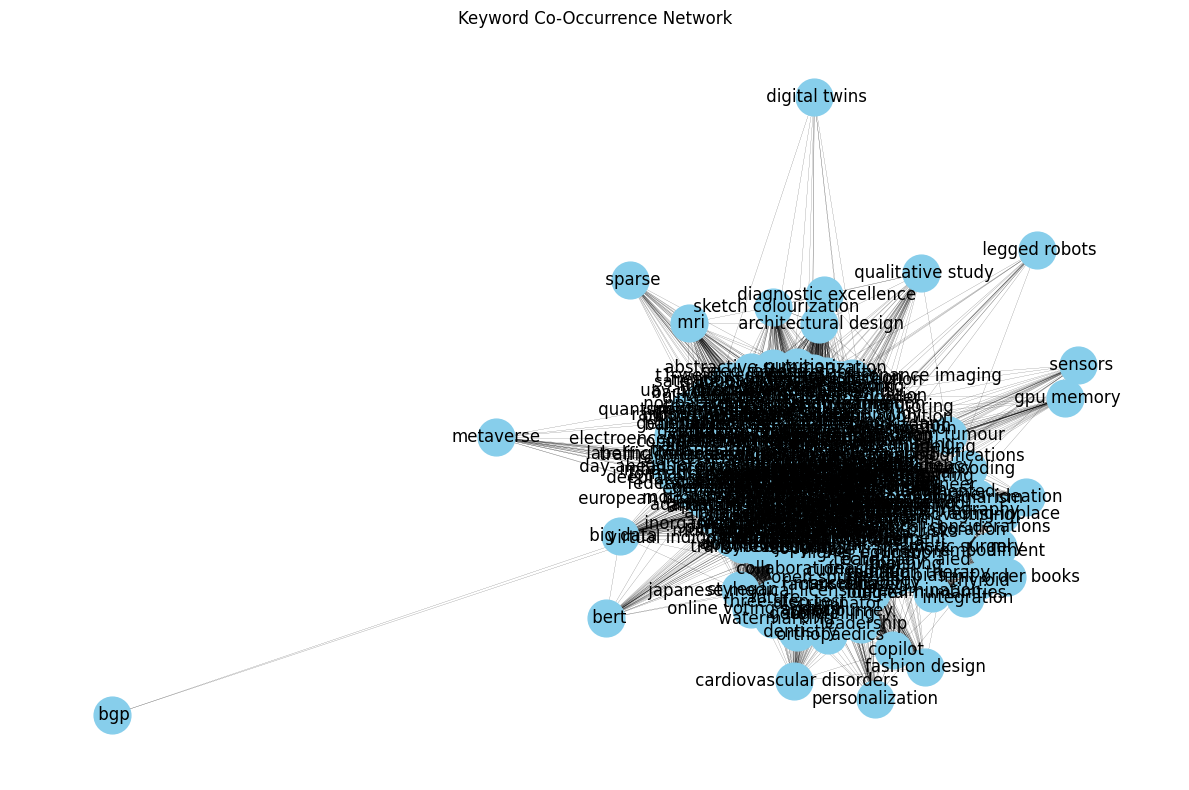

In [14]:
def network_graph(co_occurrence_matrix):
    G = nx.Graph()
    for keyword in co_occurrence_matrix.columns:
        for other_keyword in co_occurrence_matrix.columns:
            weight = co_occurrence_matrix.loc[keyword, other_keyword]
            if weight > 0:
                G.add_edge(keyword, other_keyword, weight=weight)

    # Draw the network graph
    edge_weights = [data['weight']*0.1 for _, _, data in G.edges(data=True)]

    # Draw the network graph with enhanced quality
    fig, ax = plt.subplots(figsize=(12, 8))  # Set figure size
    pos = nx.spring_layout(G, k=0.5, iterations=100, seed=42)  # Increase 'iterations' for more spreading
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, width=edge_weights, edge_cmap=plt.cm.Blues, ax=ax)
    plt.title("Keyword Co-Occurrence Network")
    plt.tight_layout()
    plt.show()

    return G

networkGraph = network_graph(co_occurrence_matrix)
networkGraph

##**Step 5: Creating a simple table for the co-occurrence matrix**

In [15]:
# Create an empty list to store the co-occurrence pairs and their weights
co_occurrence_pairs = []

# Iterate over the co-occurrence matrix and extract pairs with non-zero co-occurrence counts
for i in range(len(co_occurrence_matrix)):
    for j in range(i+1, len(co_occurrence_matrix)):
        if co_occurrence_matrix.iloc[i, j] > 0:
            co_occurrence_pairs.append({
                "Word 1": co_occurrence_matrix.index[i],
                "Word 2": co_occurrence_matrix.columns[j],
                "Weight": co_occurrence_matrix.iloc[i, j]
            })

# Create a DataFrame from the list of co-occurrence pairs
co_occurrence_df = pd.DataFrame(co_occurrence_pairs)
co_occurrence_df = co_occurrence_df.sort_values(by='Weight', ascending=False)
# Display the resulting DataFrame
co_occurrence_df

,Word 1,Word 2,Weight
2402,ai models,artificial intelligence,68
2511,ai models,generative ai,60
2463,ai models,deep learning,55
2429,ai models,chatgpt,49
2510,ai models,generative adversarial networks,44
...,...,...,...
18158,deepfake defense,language proficiency,1
18157,deepfake defense,labeling bull-bear words,1
18156,deepfake defense,knowledge worker,1
18155,deepfake defense,k-12,1


In [16]:
# from google.colab import files
# csv_filename = 'co_occurrence_df.csv'
# co_occurrence_df.to_csv(csv_filename, index=True)
# files.download(csv_filename)

##**Conclusion**

In conclusion, our comprehensive exploration into the dynamic realm of generative AI has effectively uncovered and detailed the intricate web of research themes and trends permeating this advanced field. Through the methodical analysis of keyword co-occurrence networks and the meticulous review of literature from the Web of Science database, we have not only delineated the current intellectual landscape but also paved the way for predicting future developments in generative artificial intelligence. This study has illuminated the interconnectedness of various research areas, showcasing how pivotal themes converge and evolve within the broader AI community. Our findings, presented within an enriched Python notebook, encapsulate a detailed narrative and robust analytical methodologies, offering both academic and practical insights. As this field continues to evolve, the insights derived from our study are poised to inform ongoing academic discourse, guide practical applications, and inspire policy-making, thereby contributing significantly to the advancement of generative AI and ensuring its responsible integration into the fabric of future technological developments. This endeavor not only enriches our understanding of generative AI but also highlights the importance of continuous investigation and innovation in this rapidly advancing field.